In [1]:
# Rubrics for grading:
#
# 1. You should use Python Functions in your project (20%)
# 2. You should use Loops (10%)
# 3. You should use IF-ELSE block (20%)
# 4. Your source code should be running without errors (30%)
# 5. You are submitting your own source code and within due date (20%). Please submit individually for grading.
#
#
#

In [2]:
from operator import concat

import numpy as np                          # for array processing capabilities
import matplotlib.pyplot as plt             # inline plots of soundfiles
from mido.ports import multi_send
from pandocfilters import stringify
from scipy.io.wavfile import read, write    #
from IPython.display import Audio           # inline audio player
from numpy.fft import fft                   # library to perform fft transformations on audio files
%matplotlib inline


In [46]:
# GLOBAL definitions
amplitudeG = np.iinfo(np.int16).max; amplitudeG *= .8 # Get max value and scale it back
samplerateG = 48000
print(amplitudeG, samplerateG)

26213.600000000002 48000


In [48]:
# use Python Functions in your project
def mySinGenerator(frequency, amplitude):       # Generates a sine wav at frequency/amp.
    samplerate = samplerateG                    # Pulls global samplerate value
    t = np.linspace(0., 1., samplerate)
    data = amplitude * np.sin(2. * np.pi * frequency * t)
    return data

In [52]:
# use Python Functions in your project
def myPlot(data, title):
    max_val = np.max(data)
    print("Maximum Amplitude is: ", max_val.round(decimals=0))
    plt.figure()
    plt.plot(data)
    plt.xlabel('Sample Index')
    plt.ylabel('Amplitude')
    plt.title(title)
    plt.show()

In [6]:
# use Loops
# use Python Functions in your project
def myAddHarmonics(data,frequency,harmonics,amplitude,falloff):
    for harmonic in harmonics:
        frequencyH = frequency * harmonic
        amplitude = amplitude * falloff
        data = data + mySinGenerator(frequencyH, amplitude)
    return data

In [37]:
# use Python Functions in your project
def normalize(data):
    max_val = np.max(data)
    target = np.iinfo(np.int16).max
    # use IF-ELSE block
    if max_val > target:
        print ("Data scaled down")
        data /= max_val
        data *= target
    else:
        print ("Data scaled up")
        data *= (target/max_val)
    return data

This initial example creates a sine wave at 50 Hz and displays a portion in the plot
Maximum Amplitude is:  26214.0


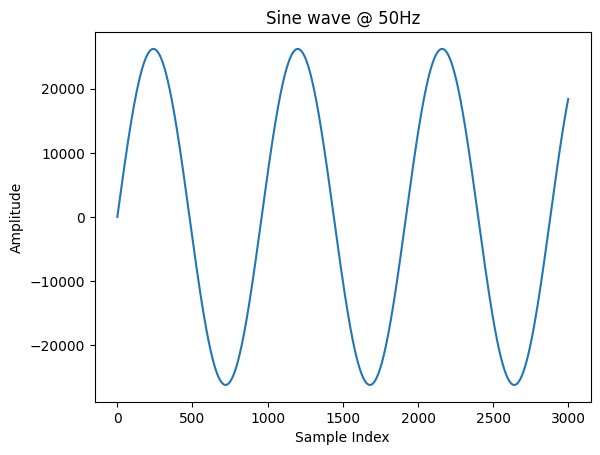

In [53]:
frequency = 50
data = mySinGenerator(frequency, amplitudeG)
print("This initial example creates a sine wave at", frequency, "Hz and displays a portion in the plot")
myPlot(data[:3000], ('Sine wave @ '  +  str(frequency) + 'Hz'))
Audio(data, rate=samplerate)

This second example adds even-numbered harmonics (2, 4, 6, 8, 10, 12) falling off by a scaling factor, and displays a portion in the plot
Maximum Amplitude is:  53235.0


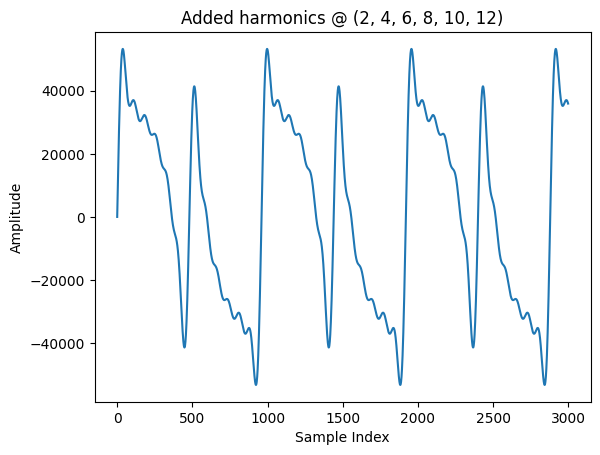

In [54]:
print("This second example adds even-numbered harmonics", str(harmonics),"falling off by a scaling factor, and displays a portion in the plot")
harmonics = (2,4,6,8,10,12)
data = myAddHarmonics(data,frequency,harmonics,32767,.7)
myPlot(data[:3000], ('Added harmonics @ '  +  str(harmonics) ))
Audio(data, rate=samplerate)

Because the addition of the harmonics caused the waveform to exceed the 16-bit maximum value, it will be scaled with this normalizing function.
Data scaled down
Maximum Amplitude is:  32767.0


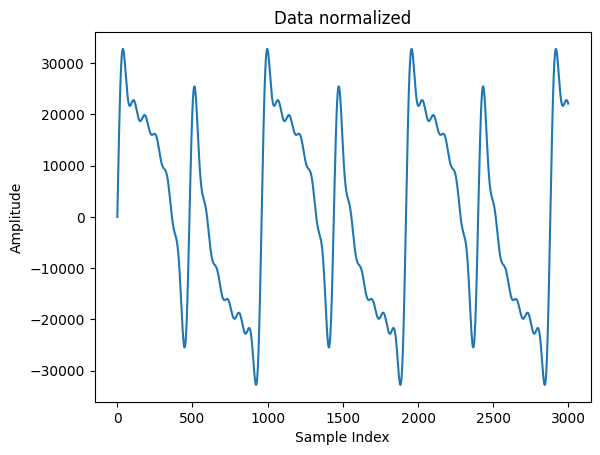

In [55]:
print("Because the addition of the harmonics caused the waveform to exceed the 16-bit maximum value, it will be scaled with this normalizing function.")
data = normalize(data)
myPlot(data[:3000], 'Data normalized')
Audio(data, rate=samplerate)